In [1]:
# %load param_dist_wpli.py
#!/usr/bin/env python2
"""
Created on Mon Sep 24 10:36:19 2018

@author: stiso

Plots distributions of parameters (alpha, beta, and m, as well as the error) selected for NMF

"""


import numpy as np
from pathlib import Path
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import pandas as pd

top_dir = '/Users/stiso/Documents/Python/NetBCI/NMF/param/'
subjs = ['001',  '002','003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', 
         '015', '016', '017', '018','019', '020']
bands = ['alpha', 'beta', 'low_gamma']
sens = ['grad']

data = pd.DataFrame()

In [2]:
idx = -1
for e in sens:
    for s in subjs:
        for b in bands: 
            # Load
            my_file = Path("".join([top_dir, s, '/', e, 'wpli_', b ,'_params.npy']))
            if my_file.is_file():
                idx = idx + 1
                params = np.load("".join([top_dir, s, '/', e, 'wpli_', b ,'_params.npy'])).item()
                error = np.load("".join([top_dir, s, '/', e, 'wpli_', b ,'_err.npy']))
                params_upr = np.load("".join([top_dir, s, '/', e, 'wpli_pr_', b ,'_params.npy'])).item()
                error_upr = np.load("".join([top_dir, s, '/', e, 'wpli_pr_', b ,'_err.npy']))
                curr = pd.DataFrame(data={'band':b, 'subj':s, 'alpha':params["alpha"], 'beta':params["beta"],
                                          'error':error[error.size-1], 'rank':params["rank"],
                                         "model": 'emp'}, index = [idx])
                curr_pr = pd.DataFrame(data={'band':b, 'subj':s, 'alpha':params_upr["alpha"], 'beta':params_upr["beta"],
                                          'error':error_upr[error_upr.size-1], 'rank':params_upr["rank"],
                                            "model": 'upr'}, index = [idx])
                data = data.append(curr)
                data = data.append(curr_pr)
                



In [7]:
data[data['band']=='low_gamma'].describe()

,alpha,beta,error,rank
count,40.000000,40.000000,40.000000,40.000000
mean,0.466679,0.420431,0.464959,7.925000
std,0.025747,0.044060,0.012377,0.416795
min,0.441248,0.392949,0.389200,6.000000
25%,0.454307,0.407138,0.466259,8.000000
50%,0.464194,0.411382,0.466725,8.000000
75%,0.470387,0.416779,0.467651,8.000000
max,0.604777,0.648154,0.470164,9.000000


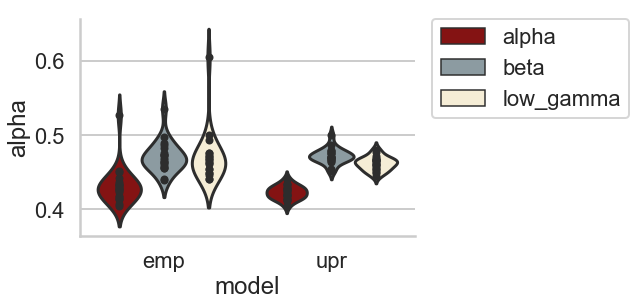

In [247]:
# Plot
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.despine()
sns.set_context("poster")
colors = ["#970000","#899da4", "#faefd1", ]

sns.set_palette(colors)
sns_plot = sns.violinplot(x='model',y = 'alpha', data=data, hue="band",inner = "point")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
figure = sns_plot.get_figure()    
figure.savefig('alphas.pdf')
                

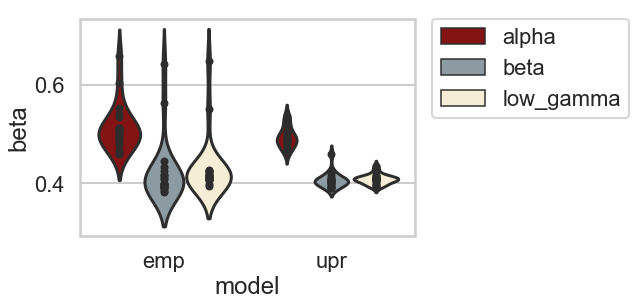

In [246]:
sns_plot = sns.violinplot(x='model',y = 'beta', data=data, hue="band", inner = "point")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
figure = sns_plot.get_figure()    
figure.savefig('betas.pdf')

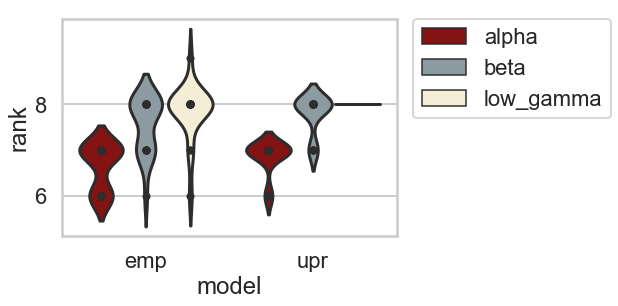

In [248]:
sns_plot = sns.violinplot(x='model',y = 'rank', data=data, hue="band", inner = "point")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
figure = sns_plot.get_figure()    
figure.savefig('ranks.pdf')

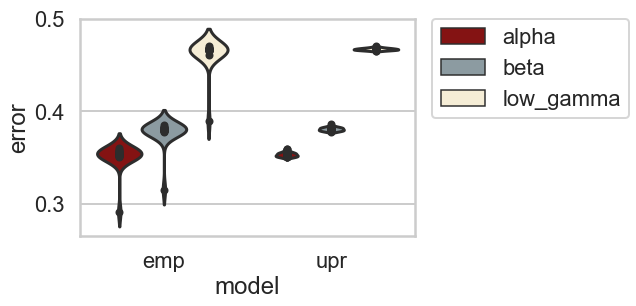

In [249]:
sns_plot = sns.violinplot(x='model',y = 'error', data=data, hue="band", inner = "point")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
figure = sns_plot.get_figure()    
figure.savefig('errors.pdf')

In [155]:
# check means across bands
print(data[data['model']=='emp']['rank'].mean())
print(data[data['model']=='emp']['alpha'].mean())
print(data[data['model']=='emp']['beta'].mean())
print(data[data['model']=='emp']['error'].mean())

7.35
0.458308782744
0.456816416954
0.397070787353


In [156]:
# check means across bands
print(data[data['model']=='upr']['rank'].mean())
print(data[data['model']=='upr']['alpha'].mean())
print(data[data['model']=='upr']['beta'].mean())
print(data[data['model']=='upr']['error'].mean())

7.55
0.452501960036
0.436854434931
0.400602571741


In [234]:
# Get parameters from second run
top_dir = '/Users/stiso/Documents/Python/NetBCI/NMF/'
data2 = pd.DataFrame()

idx = -1
for e in sens:
    for s in subjs:
        for b in bands: 
            # Load
            my_file = Path("".join([top_dir, s, '/', e, '/wpli_', b ,'_params.npy']))
            if my_file.is_file():
                idx = idx + 1
                params = np.load("".join([top_dir, s, '/', e, '/wpli_', b ,'_params.npy'])).item()
                error = np.load("".join([top_dir, s, '/', e, '/wpli_', b ,'_err.npy']))
                curr = pd.DataFrame(data={'alpha2':params["alpha"], 'beta2':params["beta"],
                                          'error2':error[error.size-1], 'rank2':params["rank"]}, index = [idx])
                data2 = data2.append(curr)


In [185]:
data2.head()

,alpha2,beta2,error2,rank2
0,0.450543,0.524885,0.356512,6
1,0.475366,0.396961,0.380022,8
2,0.475429,0.385296,0.466390,8
3,0.432936,0.499530,0.357216,7
4,0.476255,0.402598,0.379671,8


In [186]:
data_compare = pd.concat([data[data["model"]=="emp"],data2],axis=1)

In [187]:
data_compare.head()

,alpha,band,beta,error,model,rank,subj,alpha2,beta2,error2,rank2
0,0.452328,alpha,0.505677,0.356503,emp,6,001,0.450543,0.524885,0.356512,6
1,0.497544,beta,0.383483,0.379973,emp,8,001,0.475366,0.396961,0.380022,8
2,0.467913,low_gamma,0.416622,0.466459,emp,8,001,0.475429,0.385296,0.466390,8
3,0.417778,alpha,0.494798,0.357175,emp,7,002,0.432936,0.499530,0.357216,7
4,0.460547,beta,0.399505,0.379640,emp,8,002,0.476255,0.402598,0.379671,8


In [188]:
data_compare.tail()

,alpha,band,beta,error,model,rank,subj,alpha2,beta2,error2,rank2
55,0.462347,beta,0.416191,0.381048,emp,7,019,0.464938,0.404533,0.380259,8
56,0.472308,low_gamma,0.408380,0.466693,emp,8,019,0.461336,0.408439,0.466453,8
57,0.426729,alpha,0.512794,0.357429,emp,6,020,0.441594,0.502438,0.357358,6
58,0.475951,beta,0.391736,0.382110,emp,8,020,0.475832,0.391788,0.382146,8
59,0.454732,low_gamma,0.412233,0.467824,emp,8,020,0.450940,0.416750,0.467793,8


<Figure size 432x288 with 0 Axes>

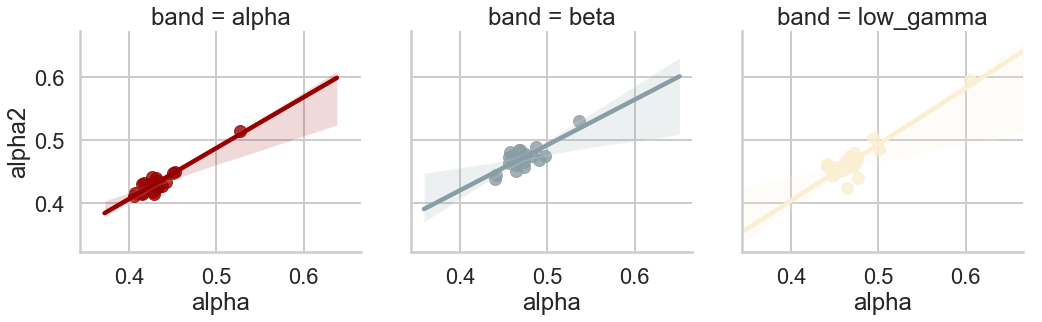

In [235]:
sns.set_style("whitegrid")
sns.despine()
sns.set_context("poster")
colors = ["#970000", "#faefd1", "#899da4"]

sns_plot = sns.lmplot(x='alpha',y='alpha2', data = data_compare, hue = 'band', col = "band")
sns_plot.savefig('alpha_corr.pdf')

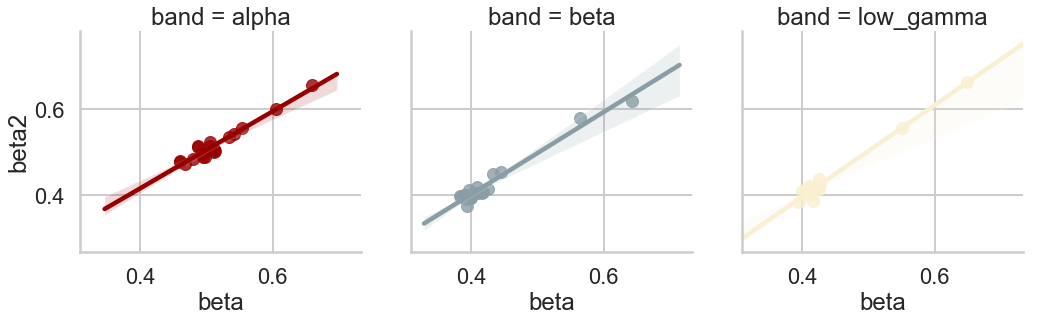

In [236]:
sns_plot = sns.lmplot(x='beta',y='beta2', data = data_compare, hue = 'band', col = "band")
sns_plot.savefig('beta_corr.pdf')

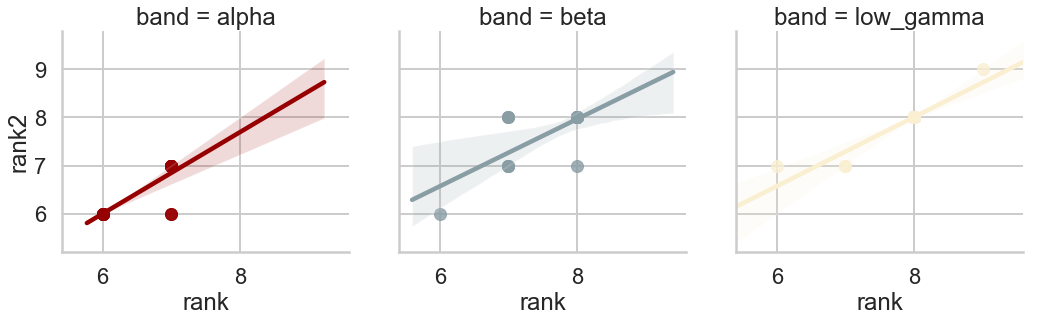

In [237]:
sns_plot = sns.lmplot(x='rank',y='rank2', data = data_compare, hue = 'band', col = "band")
sns_plot.savefig('rank_corr.pdf')

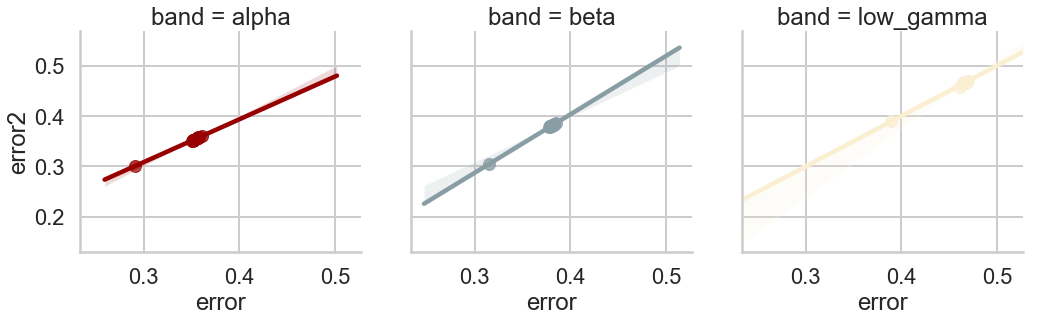

In [238]:
sns_plot = sns.lmplot(x='error',y='error2', data = data_compare, hue = 'band', col = "band")
sns_plot.savefig('error_corr.pdf')